In [4]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression ########imp.....

In [5]:
df = yf.download('^GSPC',start='2010-01-01')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df['ret'] = df.Close.pct_change()

In [7]:
df['intraret'] = df.Close / df.Open - 1

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,intraret
Date,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,0.014715
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,0.003408
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.001259
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.004770
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.003910
...,...,...,...,...,...,...,...,...
2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000,-0.008933,-0.011907
2024-08-23,5602.490234,5641.819824,5585.160156,5634.609863,5634.609863,3291940000,0.011483,0.005733
2024-08-26,5639.660156,5651.620117,5602.339844,5616.839844,5616.839844,2938570000,-0.003154,-0.004046


In [9]:
df.ret

Date
2010-01-04         NaN
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
                ...   
2024-08-22   -0.008933
2024-08-23    0.011483
2024-08-26   -0.003154
2024-08-27    0.001595
2024-08-28   -0.000466
Name: ret, Length: 3688, dtype: float64

In [10]:
def lagit(df, lags):
    for i in range(1,lags + 1): #### +1 because no stop value
        df['Lag_'+str(i)] = df['ret'].shift(i)
    return ['Lag_'+str(i) for i in range(1,lags+1)] #lags -> feature names

In [18]:
lagit(df,2)

['Lag_1', 'Lag_2']

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,intraret,Lag_1,Lag_2
Date,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,0.014715,NaN,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,0.003408,NaN,NaN
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.001259,0.003116,NaN
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.004770,0.000546,0.003116
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.003910,0.004001,0.000546
...,...,...,...,...,...,...,...,...,...,...
2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000,-0.008933,-0.011907,0.004240,-0.001985
2024-08-23,5602.490234,5641.819824,5585.160156,5634.609863,5634.609863,3291940000,0.011483,0.005733,-0.008933,0.004240
2024-08-26,5639.660156,5651.620117,5602.339844,5616.839844,5616.839844,2938570000,-0.003154,-0.004046,0.011483,-0.008933


In [325]:
df['direction'] = np.where(df.ret > 0,1,0) #####imp. (when the market went up: 1 else: 0)

In [326]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,intraret,direction
Date,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,0.014715,0
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,0.003408,1
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.001259,1
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.004770,1
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.003910,1
...,...,...,...,...,...,...,...,...,...
2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000,0.004240,0.003170,1
2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000,-0.008933,-0.011907,0
2024-08-23,5602.490234,5641.819824,5585.160156,5634.609863,5634.609863,3291940000,0.011483,0.005733,1


In [327]:
df.direction.value_counts()

direction
1    2007
0    1680
Name: count, dtype: int64

In [328]:
features = lagit(df,3)

In [329]:
features

['Lag_1', 'Lag_2', 'Lag_3']

In [330]:
df.dropna(inplace=True)

In [331]:
X = df[features]

In [393]:
X

,Lag_1,Lag_2,Lag_3
Date,,,
2010-01-08,0.004001,0.000546,0.003116
2010-01-11,0.002882,0.004001,0.000546
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
...,...,...,...
2024-08-21,-0.001985,0.009722,0.001990
2024-08-22,0.004240,-0.001985,0.009722
2024-08-23,-0.008933,0.004240,-0.001985


In [332]:
y = df['direction']

In [333]:
model = LogisticRegression(class_weight='balanced')#####imp.....

In [334]:
model.fit(X,y)

LogisticRegression(class_weight='balanced')

In [335]:
df['prediction_LR'] = model.predict(X) ##### IMP....

In [336]:
df['prediction_LR'].value_counts()

prediction_LR
0    1876
1    1807
Name: count, dtype: int64

In [337]:
df['strat'] = df['prediction_LR'] * df.intraret

In [338]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,intraret,direction,Lag_1,Lag_2,Lag_3,prediction_LR,strat
Date,,,,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.003910,1,0.004001,0.000546,0.003116,0,0.000000
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.000890,1,0.002882,0.004001,0.000546,0,0.000000
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,-0.006636,0,0.001747,0.002882,0.004001,0,-0.000000
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,0.007359,1,-0.009381,0.001747,0.002882,1,0.007359
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.002426,1,0.008326,-0.009381,0.001747,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000,0.004240,0.003170,1,-0.001985,0.009722,0.001990,1,0.003170
2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000,-0.008933,-0.011907,0,0.004240,-0.001985,0.009722,0,-0.000000
2024-08-23,5602.490234,5641.819824,5585.160156,5634.609863,5634.609863,3291940000,0.011483,0.005733,1,-0.008933,0.004240,-0.001985,1,0.005733


<Axes: xlabel='Date'>

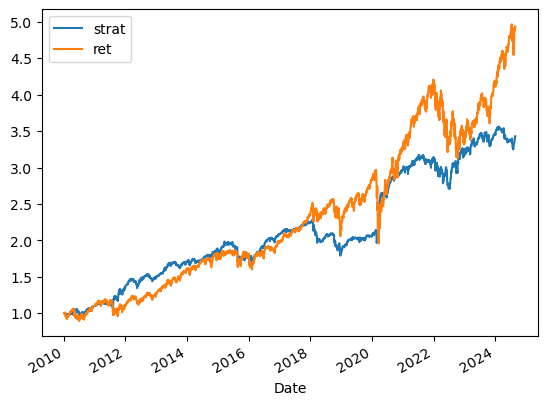

In [339]:
(df[['strat','ret']] + 1).cumprod().plot()  #####Overfitting in this case (whole dataset used)

In [340]:
(df[['strat','ret']] + 1).cumprod()-1

,strat,ret
Date,,
2010-01-08,0.000000,0.002882
2010-01-11,0.000000,0.004634
2010-01-12,0.000000,-0.004791
2010-01-13,0.007359,0.003495
2010-01-14,0.007359,0.005930
...,...,...
2024-08-21,2.395634,3.923272
2024-08-22,2.395634,3.879293
2024-08-23,2.415101,3.935324


In [341]:
from sklearn.model_selection import train_test_split #####imp.

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=False,) #####training on 70% of the data

In [343]:
#### shuffle= False because it's a time series so subsequent data should be used

In [344]:
X_train

,Lag_1,Lag_2,Lag_3
Date,,,
2010-01-08,0.004001,0.000546,0.003116
2010-01-11,0.002882,0.004001,0.000546
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
...,...,...,...
2020-03-31,0.033516,-0.033687,0.062414
2020-04-01,-0.016013,0.033516,-0.033687
2020-04-02,-0.044142,-0.016013,0.033516


In [345]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [375]:
X_test['prediction_LR'] = model.predict(X_test)

In [282]:
### we now need to filter the df for only test data (returns)

In [379]:
X_test['ret'] = df.ret[X_test.index[0]:]

In [381]:
X_test['strat'] = X_test['prediction_LR'] * X_test.ret

<Axes: xlabel='Date'>

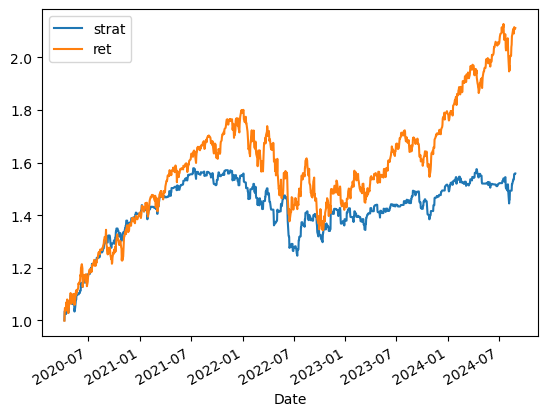

In [383]:
(X_test[['strat','ret']] + 1).cumprod().plot()

In [389]:
(X_test.tail(50)[['strat','ret']] + 1).cumprod() #trading for last 50 days ******

,strat,ret
Date,,
2024-06-17,1.000000,1.007664
2024-06-18,1.000000,1.010205
2024-06-20,0.997474,1.007653
2024-06-21,0.995916,1.006079
2024-06-24,0.995916,1.002995
2024-06-25,0.999833,1.006941
2024-06-26,0.999833,1.008524
2024-06-27,1.000741,1.009439
2024-06-28,1.000741,1.005317


In [391]:
#####Consider transaction costs as well ( while moving in and out of the market)